In [1]:
import pandas as pd
import os
import numpy as np
from keras import utils
from tensorflow.keras.callbacks import TensorBoard
from time import time
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [658]:
question11 = pd.read_csv('/kaggle/input/datasetar/Data/Question_11.csv', sep=',')
question11.head()

,ID,Question,Réponse,Score
0,11,ما هي مهنة النَّبيِّ -صلّى الله عليه وسلّم- قب...,كان -عليه الصّلاة والسّلام- يعمل برعي الأغنام ...,2
1,11,ما هي مهنة النَّبيِّ -صلّى الله عليه وسلّم- قب...,كان راعيًا للأغنام,1
2,11,ما هي مهنة النَّبيِّ -صلّى الله عليه وسلّم- قب...,كان يمارس مهنة الرعي,1
3,11,ما هي مهنة النَّبيِّ -صلّى الله عليه وسلّم- قب...,كان يشتغل كراعي للمواشي,1
4,11,ما هي مهنة النَّبيِّ -صلّى الله عليه وسلّم- قب...,كان يعمل في رعاية الحيوانات,0


In [659]:
question11['Score'].unique()

array([2, 1, 0])

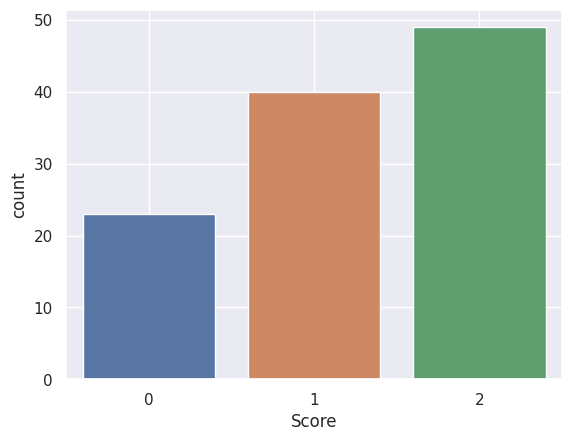

In [660]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = question11, x= 'Score')
plt.grid(True)
plt.show()

In [661]:
question11.isnull().sum()

ID          0
Question    0
Réponse     0
Score       0
dtype: int64

In [662]:
rows_with_null_values = question11[question11['Réponse'].isnull()]

# Now you can display or inspect the rows
print(rows_with_null_values)

Empty DataFrame
Columns: [ID, Question, Réponse, Score]
Index: []


In [663]:
# Assuming your DataFrame is named 'question4'
#
question11.dropna(subset=['Réponse'], inplace=True)


In [664]:
question11['Réponse'].isna().sum()

0

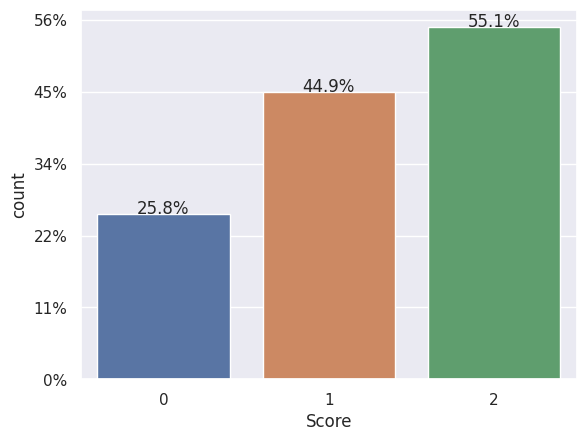

In [665]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming 'data' is your DataFrame and 'Score' is a column in your DataFrame
sns.set(style="darkgrid")

# Create the count plot
ax = sns.countplot(data=question11, x='Score')

# Calculate the percentage of each category
total = len(question1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total:.1%}', ha="center")

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=total))

plt.show()

In [666]:
question11.shape

(112, 4)

In [667]:
question11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        112 non-null    int64 
 1   Question  112 non-null    object
 2   Réponse   112 non-null    object
 3   Score     112 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.6+ KB


In [668]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your dataset
# Replace 'your_column' with the actual column name you want to check for duplicates

# Check for duplicates based on all columns
duplicate_rows = question11[question11.duplicated()]

# Check for duplicates based on a specific column
duplicate_rows_specific_column = question11[question11.duplicated(subset=['Réponse'])]

# Get the number of duplicates
num_duplicates = len(duplicate_rows)
num_duplicates_specific_column = len(duplicate_rows_specific_column)

print(f"Total duplicates: {num_duplicates}")
print(f"Duplicates in 'Réponse': {num_duplicates_specific_column}")


Total duplicates: 59
Duplicates in 'Réponse': 59


In [300]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [301]:
!pip install -U nltk

In [645]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))
#stop_words

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [669]:
#data avant stopwrds removed
question11['Réponse']

0      كان -عليه الصّلاة والسّلام- يعمل برعي الأغنام ...
1                                     كان راعيًا للأغنام
2                                   كان يمارس مهنة الرعي
3                                كان يشتغل كراعي للمواشي
4                            كان يعمل في رعاية الحيوانات
                             ...                        
107     قبل بعثته، كان النبي -صلى الله عليه وسلم- يعت...
108     قبل بعثته، كان النبي -صلى الله عليه وسلم- يعت...
109    قبل بعثته، كان النبي -صلّى الله عليه وسلّم- يع...
110                                                 مؤدن
111                                                 مؤدن
Name: Réponse, Length: 112, dtype: object

In [670]:
#Drop stop words
from nltk.stem.arlstem import ARLSTem
stemmmer = ARLSTem()

def remove_stowords(elements):
    corps = []
    for string in elements :
        string = nltk.sent_tokenize(string.strip())
        string = [ stemmmer.stem(word) for word in string if not word in stop_words ]
        string = ''.join(string)
        corps.append(string)
    return corps

In [671]:
corps11 = remove_stowords(question11['Réponse'])

In [566]:
#data after applying stopwords
# corps10

In [672]:
# tokenization
from keras.preprocessing.text import Tokenizer,text_to_word_sequence , one_hot , text_to_word_sequence
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle




# Train tokenization
tokenizer = Tokenizer(filters=''''!"#$%&()+,-./:;<=>?@[\\]^{|}~\t\n÷×؛<>()&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''''' )
#tokenizer = Tokenizer(filters='#' )

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(corps11)

with open('TokenizerModel11.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(corps11)

# Pad sequences to ensure uniform length
max_sequence_length = max(len(s) for s in sequences)
sequences = pad_sequences(sequences, max_sequence_length)

# Get the word-to-index mapping
vocab_dict = tokenizer.word_index

# Calculate the vocabulary size
vocab_size = len(vocab_dict) + 1

#print(vocab_dict)

In [673]:
max_sequence_length

15

In [675]:
# vocab_dict

In [38]:
!pip3 install gensim

In [39]:
from gensim.models import KeyedVectors
fasttext_model = KeyedVectors.load_word2vec_format("/kaggle/input/fast-text-translation-data/fast_text_files/vectors/wiki.ar.vec")

In [676]:
# Word Embedding
from keras.layers import Embedding
import numpy as np

# Embedding Dimension
EMBEDDING_DIM = 300

# Total number of words in the vocabulary, including an index for unknown words
num_words = len(vocab_dict) + 1

# Counter for words not present in the FastText model
count = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

# Iterate through each word in the vocabulary
for word, idx in vocab_dict.items():
    # Check if the word is present in the FastText model
    if word in fasttext_model:
        # If yes, assign the FastText model's embedding vector to the word in the matrix
        embedding_matrix[idx] = fasttext_model.get_vector(word)
    else:
        # If the word is not present, increment the counter and print a message
        count += 1
        print("Word does not exist in the vocabulary ---> " + word)

       # Note: We could also assign a special embedding vector for unknown words.
        embedding_matrix[idx] = fasttext_model.get_vector("unk")

Word does not exist in the vocabulary ---> للاغنام
Word does not exist in the vocabulary ---> بالاغنام
Word does not exist in the vocabulary ---> وبالتجار
Word does not exist in the vocabulary ---> والمراعا
Word does not exist in the vocabulary ---> ببراع


In [677]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.059529  , -0.030313  , -0.024073  , ..., -0.069491  ,
         0.010347  ,  0.086476  ],
       [-0.13447   , -0.17579   , -0.17562   , ..., -0.20851   ,
        -0.10205   ,  0.62562001],
       ...,
       [ 0.0080799 , -0.038627  ,  0.25608999, ..., -0.12182   ,
        -0.034996  ,  0.10591   ],
       [-0.010411  ,  0.0099534 , -0.53267002, ..., -0.40898001,
        -0.38045999, -0.19392   ],
       [ 0.023753  , -0.12301   , -0.32172   , ..., -0.19643   ,
         0.10492   , -0.23308   ]])

In [678]:
X = sequences

In [679]:
# X

In [680]:
Score = question11['Score']
y = tf.keras.utils.to_categorical(
    Score, num_classes=3, dtype='float32'
)

In [681]:
# y

In [684]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [685]:
y_test.shape

(23, 3)

In [693]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1

input_dim=vocab_size
output_dim=33
input_length=max_sequence_length


# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
model.add(LSTM(units=10,kernel_regularizer=l2(0.0001)))
model.add(Dense(3, activation='softmax'))

Epoch 1/80
2/2 [==============================] - 3s 633ms/step - loss: 1.0996 - accuracy: 0.3258 - val_loss: 1.0977 - val_accuracy: 0.5652
Epoch 2/80
2/2 [==============================] - 0s 174ms/step - loss: 1.0944 - accuracy: 0.5169 - val_loss: 1.0930 - val_accuracy: 0.6087
Epoch 3/80
2/2 [==============================] - 0s 227ms/step - loss: 1.0893 - accuracy: 0.6629 - val_loss: 1.0887 - val_accuracy: 0.8261
Epoch 4/80
2/2 [==============================] - 0s 165ms/step - loss: 1.0843 - accuracy: 0.8202 - val_loss: 1.0834 - val_accuracy: 0.8261
Epoch 5/80
2/2 [==============================] - 0s 36ms/step - loss: 1.0791 - accuracy: 0.8315 - val_loss: 1.0777 - val_accuracy: 0.6087
Epoch 6/80
2/2 [==============================] - 0s 189ms/step - loss: 1.0738 - accuracy: 0.7978 - val_loss: 1.0719 - val_accuracy: 0.6087
Epoch 7/80
2/2 [==============================] - 0s 35ms/step - loss: 1.0679 - accuracy: 0.7865 - val_loss: 1.0663 - val_accuracy: 0.6087
Epoch 8/80
2/2 [======

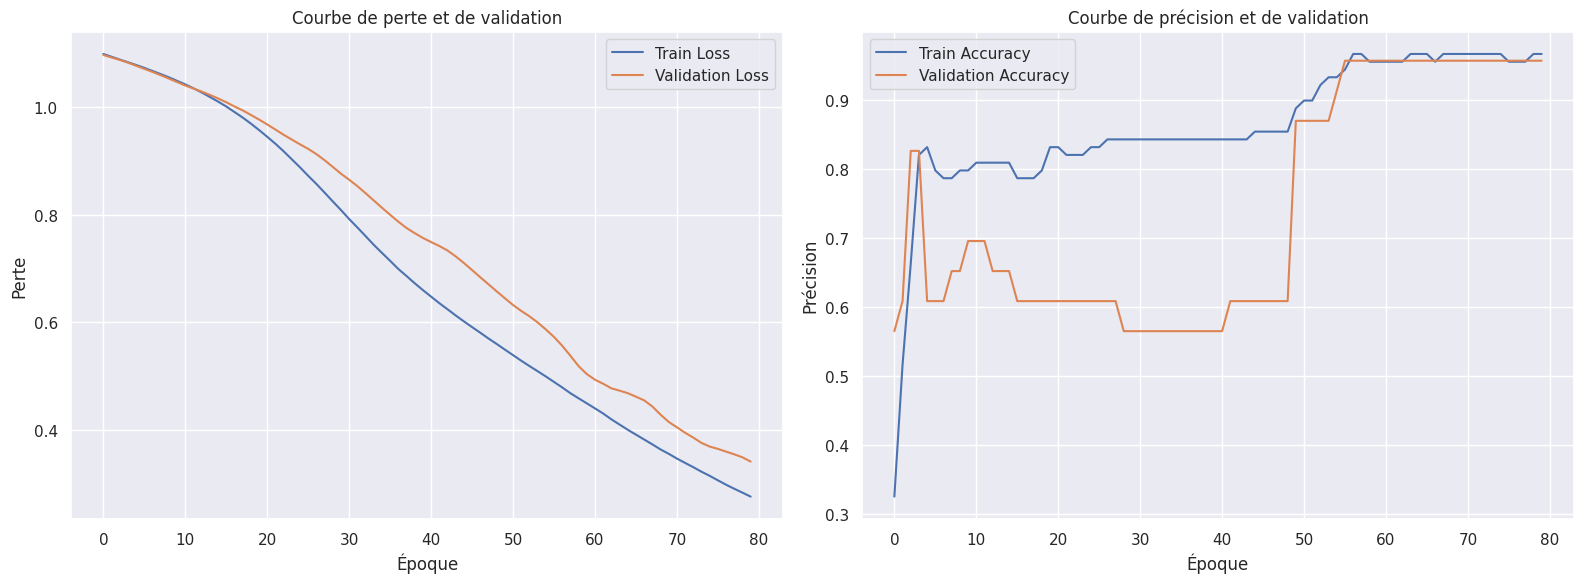

In [694]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=64, epochs=80, verbose=1)



plt.figure(figsize=(16, 6))
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de perte et de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()


# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Courbe de précision et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()

In [695]:
scores_trainig = model.evaluate(X_train, y_train, verbose=1)
print("Training Loss: %f%%" % (scores_trainig[0]))
print("Training Accuracy: %.2f%%" % (scores_trainig[1]*100))

3/3 [==============================] - 0s 6ms/step - loss: 0.2695 - accuracy: 0.9663
Training Loss: 0.269537%
Training Accuracy: 96.63%


In [696]:
scores_test = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss: %f%%" % (scores_test[0]))
print("Test Accuracy: %.2f%%" % (scores_test[1]*100))

1/1 [==============================] - 0s 28ms/step - loss: 0.3408 - accuracy: 0.9565
Test Loss: 0.340840%
Test Accuracy: 95.65%


In [697]:
import numpy as np

def predict_sequence(model,response):
    
    response= remove_stowords(response)
    #print(corps)
# Convert texts to sequences of integers
    sequences = tokenizer.texts_to_sequences(response)

# Pad sequences to ensure uniform length

    sequences = pad_sequences(sequences, max_sequence_length)
   
    
    #print(sequences)
    # Reshape the input for model prediction
    #input_data = np.array([sequences])
    
    #print(input_data)
    # Make predictions
    predicted_probs = model.predict(sequences)
    predicted_value= np.argmax(predicted_probs, axis=1)
    
    #print(predicted_classes)
   
    return predicted_value[0]

In [706]:
test=['راعي للأغنام,']

In [707]:
predict_sequence(model,test)

1/1 [==============================] - 0s 19ms/step


1

In [708]:
from keras.models import load_model

# Assuming 'model' is your Keras model
model.save('model11.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
